# Projeto Aprendizado de Máquina

Aluno: Pedro Henrique Ramos Lauton<br>
Protocolo: GU3046222<br>
Professor: Rodrigo Campos Bortoletto

# Importação dos dados

Abaixo segue os passos utilizados para o processamento e recorte da base de dados

In [3]:
#Bibliotecas iniciais 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Importação dos dados
df_HY_VEE = pd.read_csv('Iowa_liquor_Sales_2633.csv')
df_HY_VEE.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S04134900053,02/16/2012,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,34433,GREY GOOSE VODKA,12,750,17.97,26.96,12,323.52,9.0,2.38
1,S13981300106,08/19/2013,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,53368,ST. CHARLES BRANDY,6,1750,10.53,15.79,6,94.74,10.5,2.77
2,S21192300100,09/15/2014,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,52319,CHRISTIAN BROS BRANDY-ROUND,12,1000,7.11,10.67,12,128.04,12.0,3.17
3,S12271500059,05/16/2013,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,37417,POPOV VODKA 80 PRF,12,1000,5.50,8.25,24,198.00,24.0,6.34
4,S19505800055,06/11/2014,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,73517,DEKUYPER CACTUS JUICE,12,1000,7.62,11.43,1,11.43,1.0,0.26


# Pré-processamento

Os passos a seguir visam entender a base de dados, bem como ajustar para o aprendizado de máquina. 


### Exploração dos dados

Exploração inicial dos dados.

In [7]:
#Informações dos dados
df_HY_VEE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249567 entries, 0 to 249566
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Invoice/Item Number    249567 non-null  object 
 1   Date                   249567 non-null  object 
 2   Store Number           249567 non-null  int64  
 3   Store Name             249567 non-null  object 
 4   Address                249567 non-null  object 
 5   City                   249567 non-null  object 
 6   Zip Code               249567 non-null  float64
 7   Store Location         249567 non-null  object 
 8   County Number          201651 non-null  float64
 9   County                 249567 non-null  object 
 10  Category               249382 non-null  float64
 11  Category Name          248926 non-null  object 
 12  Vendor Number          249566 non-null  float64
 13  Vendor Name            249566 non-null  object 
 14  Item Number            249567 non-nu

In [8]:
#Descrição dos dados
df_HY_VEE.describe()

,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,249567.0,249567.0,201651.0,2.493820e+05,249566.000000,249567.000000,249567.000000,249567.000000,249567.000000,249567.000000,249567.000000,249567.000000,249567.000000,249567.000000
mean,2633.0,50320.0,77.0,1.050683e+06,271.391311,64882.171333,10.626581,911.836994,13.172141,19.767437,33.140856,571.743146,31.679946,8.367273
std,0.0,0.0,0.0,7.728070e+04,158.833226,113929.462531,2.606953,244.364251,20.827752,31.240757,147.006022,2740.191654,146.759561,38.769715
min,2633.0,50320.0,77.0,1.011000e+06,10.000000,122.000000,1.000000,0.000000,0.000000,0.000000,-648.000000,-4801.680000,-648.000000,-171.180000
25%,2633.0,50320.0,77.0,1.022100e+06,85.000000,33818.000000,12.000000,750.000000,7.470000,11.210000,6.000000,112.500000,9.000000,2.370000
50%,2633.0,50320.0,77.0,1.032200e+06,260.000000,43337.000000,12.000000,1000.000000,10.490000,15.740000,12.000000,189.000000,12.000000,3.170000
75%,2633.0,50320.0,77.0,1.081030e+06,395.000000,77487.000000,12.000000,1000.000000,16.490000,24.740000,24.000000,378.000000,24.000000,6.340000
max,2633.0,50320.0,77.0,1.901200e+06,987.000000,999280.000000,48.000000,3500.000000,2298.840000,3448.260000,15000.000000,260832.000000,15000.000000,3962.580000


In [9]:
#Renomeando as colunas do DF
novas_colunas= ['Invoice/ItemNumber', 'Date', 'StoreNumber', 'StoreName', 'Address', 'City', 
                'ZipCode', 'StoreLocation', 'CountyNumber', 'County', 'Category', 'CategoryName', 
                'VendorNumber', 'VendorName', 'ItemNumber', 'ItemDescription', 'Pack', 'BottleVolume_ml',
                'StateBottleCost', 'StateBottleRetail', 'BottlesSold', 'Sale', 'VSold_Liters', 'VSold_Gallons']

df_HY_VEE.columns = novas_colunas
df_HY_VEE

,Invoice/ItemNumber,Date,StoreNumber,StoreName,Address,City,ZipCode,StoreLocation,CountyNumber,County,...,ItemNumber,ItemDescription,Pack,BottleVolume_ml,StateBottleCost,StateBottleRetail,BottlesSold,Sale,VSold_Liters,VSold_Gallons
0,S04134900053,02/16/2012,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,34433,GREY GOOSE VODKA,12,750,17.97,26.96,12,323.52,9.0,2.38
1,S13981300106,08/19/2013,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,53368,ST. CHARLES BRANDY,6,1750,10.53,15.79,6,94.74,10.5,2.77
2,S21192300100,09/15/2014,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,52319,CHRISTIAN BROS BRANDY-ROUND,12,1000,7.11,10.67,12,128.04,12.0,3.17
3,S12271500059,05/16/2013,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,37417,POPOV VODKA 80 PRF,12,1000,5.50,8.25,24,198.00,24.0,6.34
4,S19505800055,06/11/2014,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,73517,DEKUYPER CACTUS JUICE,12,1000,7.62,11.43,1,11.43,1.0,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249562,S07597500002,09/06/2012,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,11298,CROWN ROYAL CANADIAN WHISKY,6,1750,31.00,46.49,6,278.94,10.5,2.77
249563,S22152300095,11/03/2014,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,43137,BACARDI LIMON,12,1000,10.50,15.75,24,378.00,24.0,6.34
249564,S25253000009,04/23/2015,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,73526,DEKUYPER MELON LIQUEUR,12,750,6.30,9.45,12,113.40,9.0,2.38
249565,S06445900127,07/06/2012,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,82607,DEKUYPER SOUR APPLE,12,1000,7.35,11.02,36,396.72,36.0,9.51


In [10]:
#Verificação de nulos
df_HY_VEE.isnull().sum()

Invoice/ItemNumber        0
Date                      0
StoreNumber               0
StoreName                 0
Address                   0
City                      0
ZipCode                   0
StoreLocation             0
CountyNumber          47916
County                    0
Category                185
CategoryName            641
VendorNumber              1
VendorName                1
ItemNumber                0
ItemDescription           0
Pack                      0
BottleVolume_ml           0
StateBottleCost           0
StateBottleRetail         0
BottlesSold               0
Sale                      0
VSold_Liters              0
VSold_Gallons             0
dtype: int64

In [11]:
df_HY_VEE['Invoice/ItemNumber'].value_counts()

Invoice/ItemNumber
S04134900053       1
INV-16304700094    1
INV-16050900003    1
INV-16304700225    1
INV-16304700196    1
                  ..
INV-70793500024    1
INV-70793400016    1
INV-70793500031    1
INV-70793400084    1
S10103800006       1
Name: count, Length: 249567, dtype: int64

In [12]:
df_HY_VEE['Date'].value_counts()

Date
12/28/2018    310
05/30/2019    309
05/27/2021    288
06/02/2016    282
02/09/2017    278
             ... 
04/22/2022      1
03/03/2017      1
02/17/2017      1
08/26/2022      1
10/24/2012      1
Name: count, Length: 2258, dtype: int64

In [13]:
df_HY_VEE['StoreNumber'].value_counts()

StoreNumber
2633    249567
Name: count, dtype: int64

In [14]:
df_HY_VEE['StoreName'].value_counts()

StoreName
HY-VEE #3 / BDI / DES MOINES    249567
Name: count, dtype: int64

In [15]:
df_HY_VEE['Address'].value_counts()

Address
3221 SE 14TH ST    249567
Name: count, dtype: int64

In [16]:
df_HY_VEE['City'].value_counts()

City
DES MOINES    249567
Name: count, dtype: int64

In [17]:
df_HY_VEE['ZipCode'].value_counts()

ZipCode
50320.0    249567
Name: count, dtype: int64

In [18]:
df_HY_VEE['StoreLocation'].value_counts()

StoreLocation
POINT (-93.596754 41.554101)                    189532
POINT (-93.594780971 41.554268986)               25131
POINT (-93.596756 41.553941)                     18285
POINT (-93.5968 41.55392)                         8603
POINT (-93.59524 41.55472)                        4550
POINT (-93.59478097099998 41.55426898600007)      3461
POINT (-93.594776 41.554781)                         5
Name: count, dtype: int64

In [19]:
df_HY_VEE['CountyNumber'].value_counts()

CountyNumber
77.0    201651
Name: count, dtype: int64

In [20]:
df_HY_VEE['County'].value_counts()

County
POLK    249567
Name: count, dtype: int64

In [21]:
df_HY_VEE['Category'].value_counts()

Category
1031200.0    23148
1032200.0    18984
1011200.0    15317
1022100.0    12667
1022200.0    12518
             ...  
1091000.0        4
1090000.0        3
1011800.0        1
1011000.0        1
1070000.0        1
Name: count, Length: 101, dtype: int64

In [22]:
df_HY_VEE['CategoryName'].value_counts()

CategoryName
AMERICAN FLAVORED VODKA      16208
STRAIGHT BOURBON WHISKIES    15317
100% AGAVE TEQUILA           12151
IMPORTED FLAVORED VODKA      10969
CANADIAN WHISKIES             9838
                             ...  
OTHER PROOF VODKA                6
FLAVORED GINS                    6
JAPANESE WHISKY                  3
IOWA DISTILLERY WHISKIES         1
AMERICAN WHISKIES                1
Name: count, Length: 96, dtype: int64

In [23]:
df_HY_VEE['VendorNumber'].value_counts()

VendorNumber
260.0    42181
65.0     33185
434.0    23456
370.0    15509
35.0     14960
         ...  
659.0        1
656.0        1
547.0        1
684.0        1
361.0        1
Name: count, Length: 255, dtype: int64

In [24]:
df_HY_VEE['VendorName'].value_counts()

VendorName
DIAGEO AMERICAS                      42181
JIM BEAM BRANDS                      33185
LUXCO INC                            14003
SAZERAC COMPANY  INC                 11424
BACARDI USA INC                       9873
                                     ...  
OPICI IMPORT COMPANY                     1
DREYFUS ASHBY                            1
IMPEX BEVERAGE INC                       1
HILLROCK ESTATE DISTILLERY               1
PARK STREET IMPORTS-SWEET REVENGE        1
Name: count, Length: 327, dtype: int64

In [25]:
df_HY_VEE['ItemNumber'].value_counts()

ItemNumber
11777     1292
69947     1266
82847     1262
34457     1247
43137     1238
          ... 
985777       1
985779       1
941836       1
38225        1
910900       1
Name: count, Length: 4338, dtype: int64

In [26]:
df_HY_VEE['ItemDescription'].value_counts()

ItemDescription
BLACK VELVET                                  1586
HAWKEYE VODKA                                 1460
JIM BEAM                                      1408
JAGERMEISTER LIQUEUR                          1399
PARAMOUNT WHITE RUM                           1379
                                              ... 
MING RIVER SICHUAN BAIJIU                        1
HA CHARTREUSE YELLOW                             1
HA WHISTLEPIG THE BOSS HOG IX: SIRENS SONG       1
THE WHISTLER PX HOGSHEAD                         1
FORTY CREEK DOUBLE BARREL HA                     1
Name: count, Length: 4374, dtype: int64

In [27]:
df_HY_VEE['Pack'].value_counts()

Pack
12    192181
6      55400
3        734
1        377
10       289
24       155
4        137
5        112
20        82
8         48
9         30
48        17
2          3
15         1
44         1
Name: count, dtype: int64

In [28]:
#Visualizando a quantidade total de classes nos atributos categóricos
df_HY_VEE['BottleVolume_ml'].value_counts()

BottleVolume_ml
750     121181
1000    113014
1750     12701
50         813
375        710
500        481
3000       214
600        150
700        146
300         71
200         70
800          4
1800         2
850          2
3500         2
603          1
2400         1
20           1
250          1
2250         1
0            1
Name: count, dtype: int64

In [29]:
#Visualizando a quantidade total de classes nos atributos categóricos
df_HY_VEE['StateBottleCost'].value_counts()

StateBottleCost
8.25     6056
7.50     5549
7.87     5105
9.25     4444
11.00    4365
         ... 
62.00       1
33.10       1
19.71       1
4.87        1
28.76       1
Name: count, Length: 1781, dtype: int64

In [30]:
#Visualizando a quantidade total de classes nos atributos categóricos
df_HY_VEE['StateBottleRetail'].value_counts()

StateBottleRetail
12.38    5721
11.25    5370
11.81    5105
22.49    4265
16.50    4156
         ... 
49.65       1
29.57       1
7.31        1
80.01       1
31.21       1
Name: count, Length: 1985, dtype: int64

In [31]:
#Visualizando a quantidade total de classes nos atributos categóricos
df_HY_VEE['BottlesSold'].value_counts()

BottlesSold
12      105598
6        33950
1        26949
24       23975
36       13398
         ...  
9900         1
2700         1
7920         1
159          1
3456         1
Name: count, Length: 222, dtype: int64

In [32]:
df_HY_VEE['Sale'].value_counts()

Sale
135.00     3993
148.56     3583
90.00      3288
180.00     3001
270.00     2380
           ... 
552.00        1
249.78        1
465.36        1
2208.96       1
31.21         1
Name: count, Length: 7914, dtype: int64

In [33]:
#Visualizando a quantidade total de classes nos atributos categóricos
df_HY_VEE['VSold_Liters'].value_counts()

VSold_Liters
9.00       52519
12.00      51583
4.50       22999
0.75       22530
24.00      17236
           ...  
7920.00        1
4800.00        1
119.25         1
1350.00        1
372.00         1
Name: count, Length: 367, dtype: int64

In [34]:
#Visualizando a quantidade total de classes nos atributos categóricos
df_HY_VEE['VSold_Gallons'].value_counts()

VSold_Gallons
3.17      51583
2.37      27055
2.38      25464
6.34      17236
0.20      17219
          ...  
28.00         1
228.24        1
58.64         1
22.58         1
98.27         1
Name: count, Length: 433, dtype: int64

### Remoção de dados ruidosos

Abaixo segue a análise de dados incoerentes e prejudiciais para o aprendizado de máquina.

In [36]:
#Verificação de nulos
df_HY_VEE.isnull().sum()

Invoice/ItemNumber        0
Date                      0
StoreNumber               0
StoreName                 0
Address                   0
City                      0
ZipCode                   0
StoreLocation             0
CountyNumber          47916
County                    0
Category                185
CategoryName            641
VendorNumber              1
VendorName                1
ItemNumber                0
ItemDescription           0
Pack                      0
BottleVolume_ml           0
StateBottleCost           0
StateBottleRetail         0
BottlesSold               0
Sale                      0
VSold_Liters              0
VSold_Gallons             0
dtype: int64

In [37]:
#Os dados faltantes em 'County Number' podem ser populados com o número do condado da loja, já que a base compreender apenas uma loja. 
df_HY_VEE['CountyNumber'].value_counts()

CountyNumber
77.0    201651
Name: count, dtype: int64

In [38]:
#Populando os dados com o número do condado e removendo as linhas faltantes
df_HY_VEE['CountyNumber'] = df_HY_VEE['CountyNumber'].fillna(77.0)
df_HY_VEE = df_HY_VEE.dropna()

In [39]:
#Verificação de nulos
df_HY_VEE.isnull().sum()

Invoice/ItemNumber    0
Date                  0
StoreNumber           0
StoreName             0
Address               0
City                  0
ZipCode               0
StoreLocation         0
CountyNumber          0
County                0
Category              0
CategoryName          0
VendorNumber          0
VendorName            0
ItemNumber            0
ItemDescription       0
Pack                  0
BottleVolume_ml       0
StateBottleCost       0
StateBottleRetail     0
BottlesSold           0
Sale                  0
VSold_Liters          0
VSold_Gallons         0
dtype: int64

In [40]:
#Verificação de dados duplicados
df_HY_VEE.duplicated().sum()

0

### Observação

As variáveis categóricas não apresentam uma relação ordianal entre elas, portanto, o ideal é utilizar a técnica de One-Hot Encoding. Porém, devido a baixa capacidade de processamento do meu computador, não é possível utilizar esse técnica, visto que teria mais de 4 mil atributos e constantemente o Jupyter acusa erro de memória. Portanto, será utilizado a técnica de LabelEncoder.

In [42]:
#Aplicando o LabelEncoder nos atributos categóricos
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_HY_VEE.loc[:, 'CategoryName'] = le.fit_transform(df_HY_VEE['CategoryName'])
df_HY_VEE.loc[:,'VendorName'] = le.fit_transform(df_HY_VEE['VendorName'])
df_HY_VEE.loc[:,'ItemDescription'] = le.fit_transform(df_HY_VEE['ItemDescription'])

df_HY_VEE[['month', 'day', 'year']] = df_HY_VEE['Date'].str.split('/', expand=True)
df_HY_VEE.head()

C:\Users\Pedro Lauton\AppData\Local\Temp\ipykernel_10848\3659154711.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HY_VEE[['month', 'day', 'year']] = df_HY_VEE['Date'].str.split('/', expand=True)
C:\Users\Pedro Lauton\AppData\Local\Temp\ipykernel_10848\3659154711.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HY_VEE[['month', 'day', 'year']] = df_HY_VEE['Date'].str.split('/', expand=True)
C:\Users\Pedro Lauton\AppData\Local\Temp\ipykernel_10848\3659154711.py:9: SettingWithCopyWarning: 
A val

,Invoice/ItemNumber,Date,StoreNumber,StoreName,Address,City,ZipCode,StoreLocation,CountyNumber,County,...,BottleVolume_ml,StateBottleCost,StateBottleRetail,BottlesSold,Sale,VSold_Liters,VSold_Gallons,month,day,year
0,S04134900053,02/16/2012,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,750,17.97,26.96,12,323.52,9.0,2.38,02,16,2012
1,S13981300106,08/19/2013,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,1750,10.53,15.79,6,94.74,10.5,2.77,08,19,2013
2,S21192300100,09/15/2014,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,1000,7.11,10.67,12,128.04,12.0,3.17,09,15,2014
3,S12271500059,05/16/2013,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,1000,5.50,8.25,24,198.00,24.0,6.34,05,16,2013
4,S19505800055,06/11/2014,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,1000,7.62,11.43,1,11.43,1.0,0.26,06,11,2014


In [43]:
#Remoção dos atributos estáticos. Retirei esse atributos por apresentarem uma constante para todos os dados, não revelando percepções interresantes. 
df_HY_VEE = df_HY_VEE.drop(columns=(['Invoice/ItemNumber', 'Date', 'StoreNumber', 'StoreName', 'Address', 'City', 'ZipCode', 'StoreLocation', 'CountyNumber', 'County', 'Category', 'VendorNumber', 'ItemNumber']))
df_HY_VEE.head()

,CategoryName,VendorName,ItemDescription,Pack,BottleVolume_ml,StateBottleCost,StateBottleRetail,BottlesSold,Sale,VSold_Liters,VSold_Gallons,month,day,year
0,52,20,1730,12,750,17.97,26.96,12,323.52,9.0,2.38,02,16,2012
1,12,146,3773,6,1750,10.53,15.79,6,94.74,10.5,2.77,08,19,2013
2,12,118,901,12,1000,7.11,10.67,12,128.04,12.0,3.17,09,15,2014
3,89,75,3142,12,1000,5.50,8.25,24,198.00,24.0,6.34,05,16,2013
4,63,146,1166,12,1000,7.62,11.43,1,11.43,1.0,0.26,06,11,2014


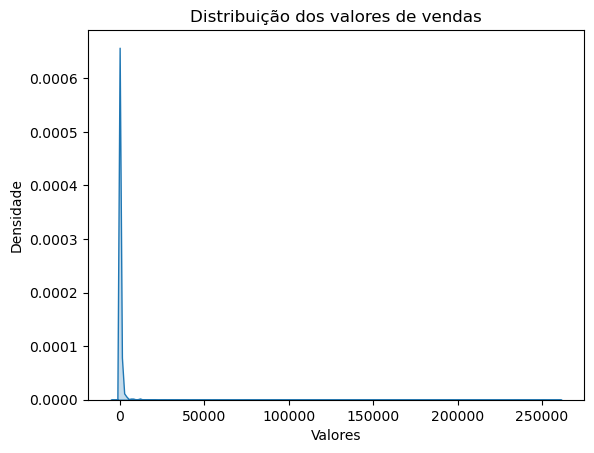

In [44]:
sns.kdeplot(df_HY_VEE['Sale'], fill=True)
plt.title("Distribuição dos valores de vendas")
plt.xlabel("Valores")
plt.ylabel("Densidade")
plt.show()

In [45]:
df_HY_VEE[(df_HY_VEE['Sale'] < 0)]

,CategoryName,VendorName,ItemDescription,Pack,BottleVolume_ml,StateBottleCost,StateBottleRetail,BottlesSold,Sale,VSold_Liters,VSold_Gallons,month,day,year
61280,13,146,1167,12,1000,7.87,11.81,-12,-141.72,-12.0,-3.17,04,10,2023
61282,1,168,1461,12,1000,13.50,20.25,-12,-243.00,-12.0,-3.17,04,19,2023
61285,55,183,1623,6,750,25.00,37.50,-6,-225.00,-4.5,-1.18,04,11,2023
61288,15,101,1553,12,750,7.93,11.90,-12,-142.80,-9.0,-2.37,04,28,2023
61293,1,21,2988,12,750,28.00,42.00,-96,-4032.00,-72.0,-19.02,04,25,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105755,15,224,3079,12,1000,4.29,6.44,-24,-154.56,-24.0,-6.34,08,08,2022
148394,11,224,4137,12,1000,7.50,11.25,-24,-270.00,-24.0,-6.34,07,25,2022
150584,49,75,3342,12,1000,16.49,24.74,-12,-296.88,-12.0,-3.17,09,06,2022
150804,49,75,3342,12,1000,16.49,24.74,-36,-890.64,-36.0,-9.51,09,20,2022


In [46]:
#Foi identificado empiricamente que o DF continha dados negativos. Assim, foram removidos automaticamente. 
df_HY_VEE = df_HY_VEE[(df_HY_VEE['Sale'] > 0)]

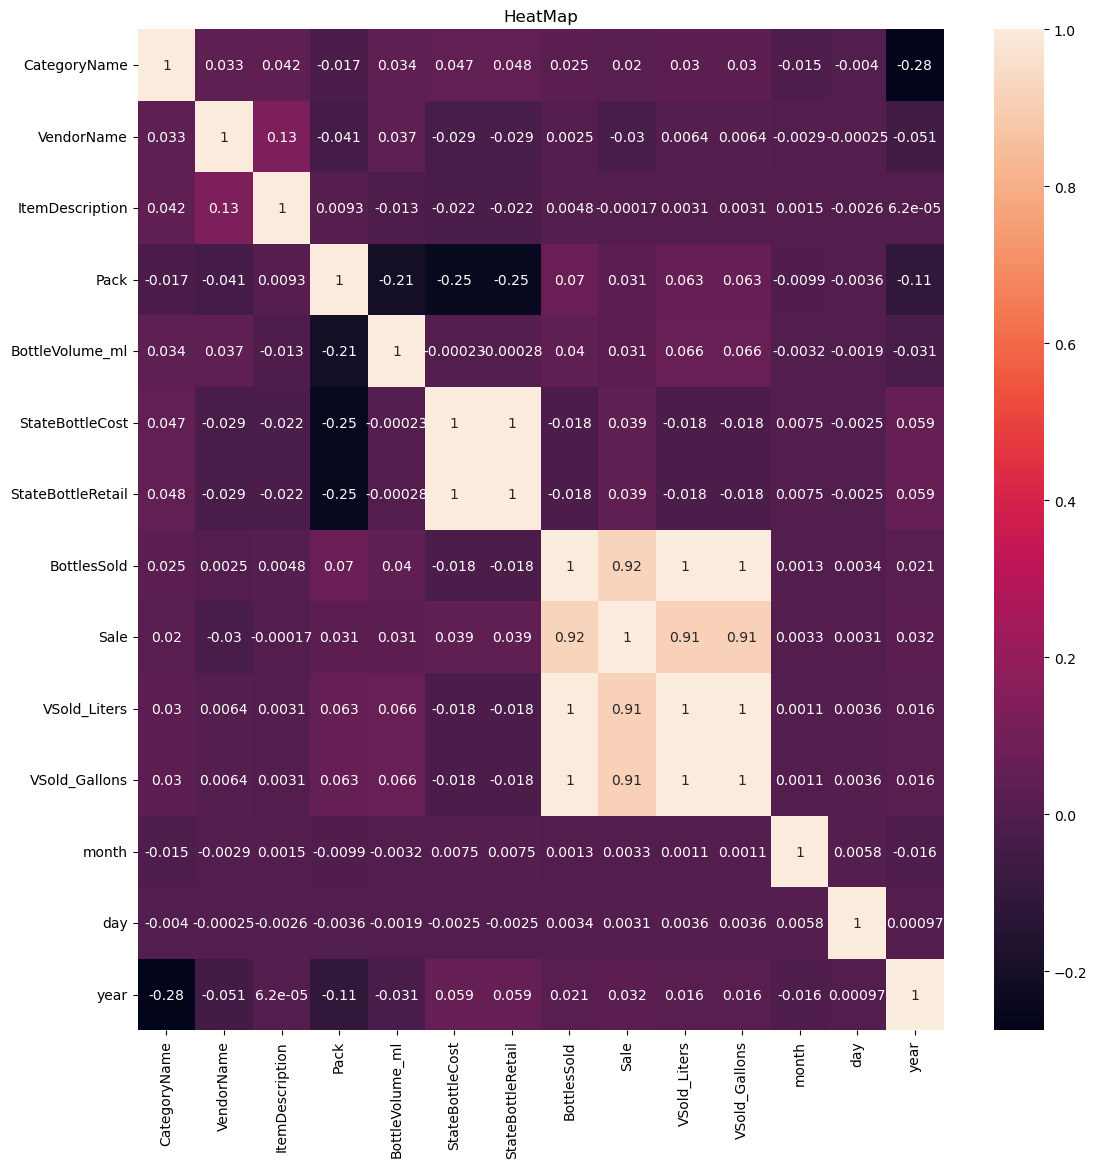

In [47]:
#Realizando o Heatmap para observar a correlação entre os atributos
plt.figure(figsize=(13,13))
plt.title("HeatMap")
sns.heatmap(df_HY_VEE[['CategoryName', 'VendorName', 'ItemDescription', 'Pack', 'BottleVolume_ml', 'StateBottleCost', 'StateBottleRetail', 'BottlesSold', 'Sale', 'VSold_Liters', 'VSold_Gallons', 'month', 'day', 'year']].corr(), annot=True)
plt.show()

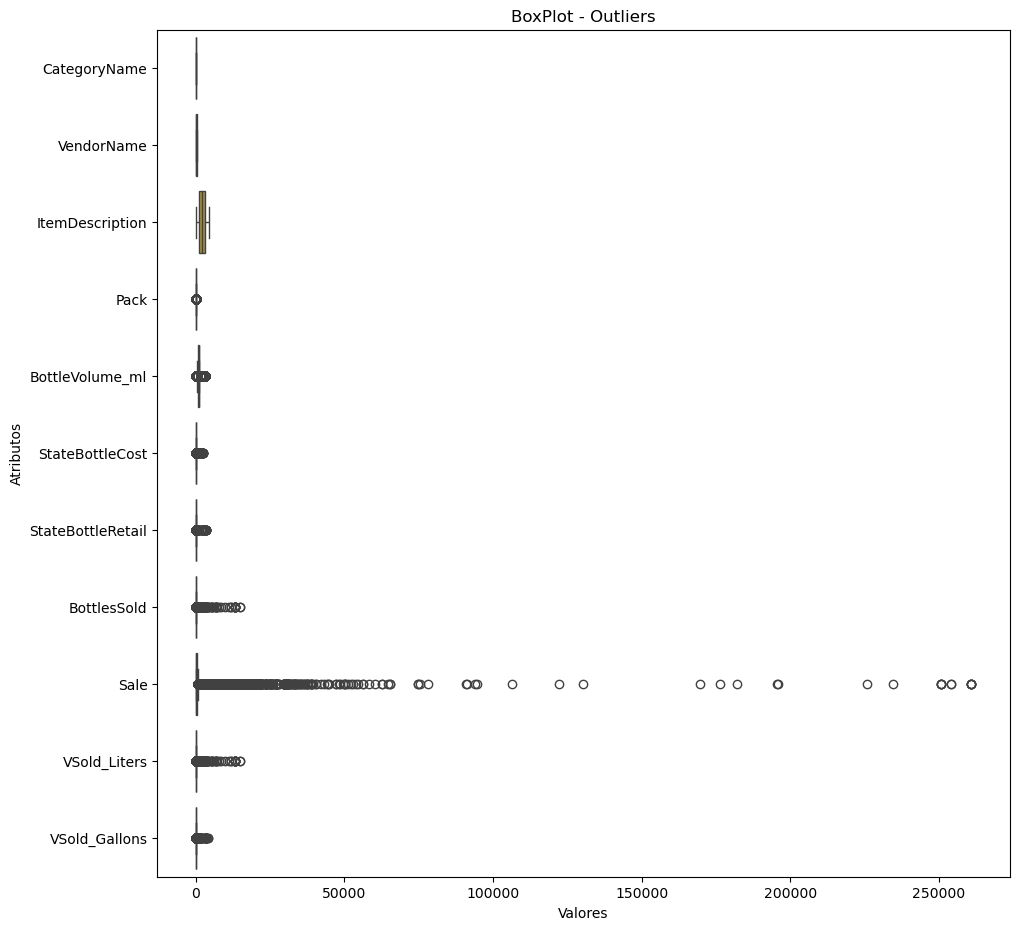

In [48]:
#Visualização dos outliers
plt.figure(figsize=(11,11))
plt.title("BoxPlot - Outliers")
plt.xlabel("Valores")
plt.ylabel("Atributos")
sns.boxplot(df_HY_VEE[['CategoryName', 'VendorName', 'ItemDescription', 'Pack', 'BottleVolume_ml', 'StateBottleCost', 'StateBottleRetail', 'BottlesSold', 'Sale', 'VSold_Liters', 'VSold_Gallons']], orient='h')
plt.show()

In [49]:
#Remoção dos outliers
df_HY_VEE_no_outliers = df_HY_VEE.copy()
df_HY_VEE_full = df_HY_VEE.copy()

for column in ['BottleVolume_ml', 'StateBottleCost', 'StateBottleRetail', 
               'BottlesSold', 'Sale', 'VSold_Liters', 'VSold_Gallons']:
    Q1 = df_HY_VEE_no_outliers[column].quantile(0.25)
    Q3 = df_HY_VEE_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    limite_superior = Q3 + (1.5 * IQR)
    limite_inferior = Q1 - (1.5 * IQR)

    df_HY_VEE_no_outliers = df_HY_VEE_no_outliers[(df_HY_VEE_no_outliers[column] >= limite_inferior) & (df_HY_VEE_no_outliers[column] <= limite_superior)]

df_HY_VEE_no_outliers

,CategoryName,VendorName,ItemDescription,Pack,BottleVolume_ml,StateBottleCost,StateBottleRetail,BottlesSold,Sale,VSold_Liters,VSold_Gallons,month,day,year
0,52,20,1730,12,750,17.97,26.96,12,323.52,9.0,2.38,02,16,2012
2,12,118,901,12,1000,7.11,10.67,12,128.04,12.0,3.17,09,15,2014
4,63,146,1166,12,1000,7.62,11.43,1,11.43,1.0,0.26,06,11,2014
5,86,235,22,12,750,14.50,21.74,12,260.88,9.0,2.38,12,16,2013
7,38,20,312,12,750,8.26,12.39,12,148.68,9.0,2.38,09,10,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249555,51,75,925,12,1000,22.75,34.13,12,409.56,12.0,3.17,01,08,2015
249559,52,66,3875,12,750,8.25,12.38,12,148.56,9.0,2.38,11,20,2014
249561,86,146,2062,12,750,13.12,19.68,12,236.16,9.0,2.38,02,12,2014
249564,60,146,1192,12,750,6.30,9.45,12,113.40,9.0,2.38,04,23,2015


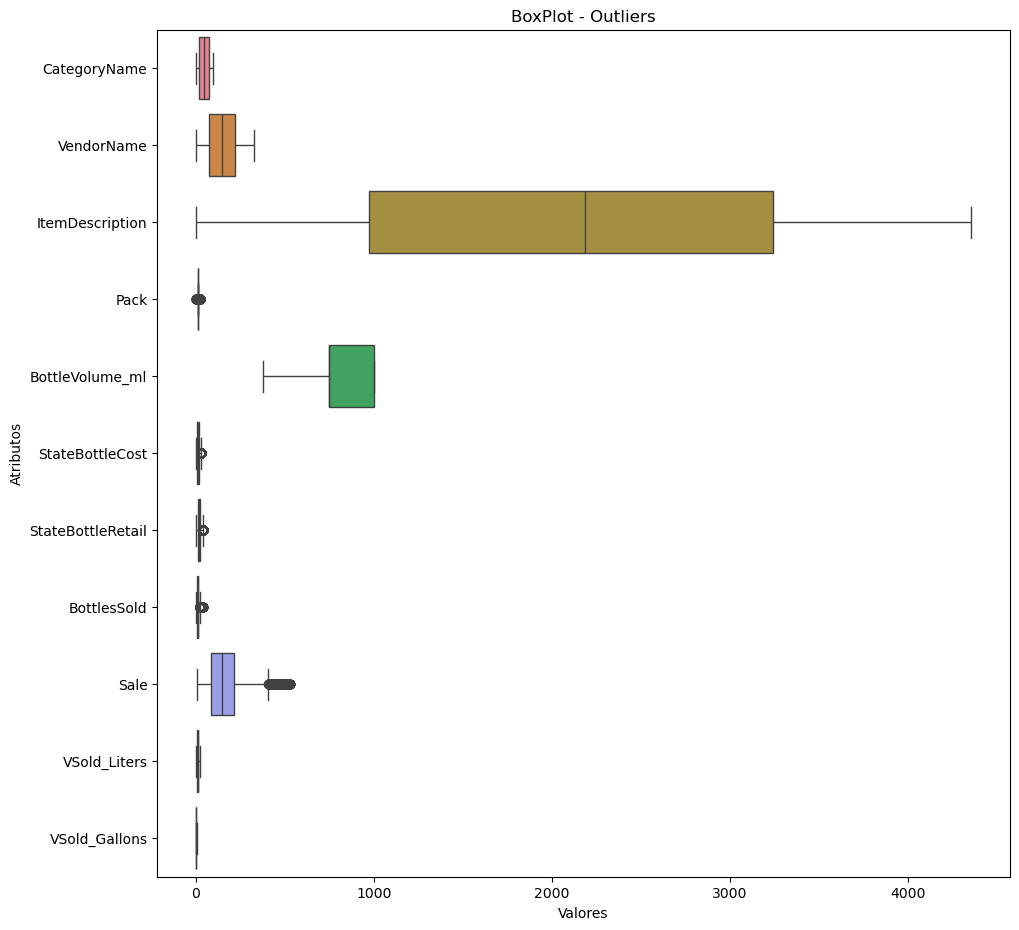

In [50]:
#Visualização dos outliers
plt.figure(figsize=(11,11))
plt.title("BoxPlot - Outliers")
plt.xlabel("Valores")
plt.ylabel("Atributos")
sns.boxplot(df_HY_VEE_no_outliers[['CategoryName', 'VendorName', 'ItemDescription', 'Pack', 'BottleVolume_ml', 'StateBottleCost', 'StateBottleRetail', 'BottlesSold', 'Sale', 'VSold_Liters', 'VSold_Gallons']], orient='h')
plt.show()

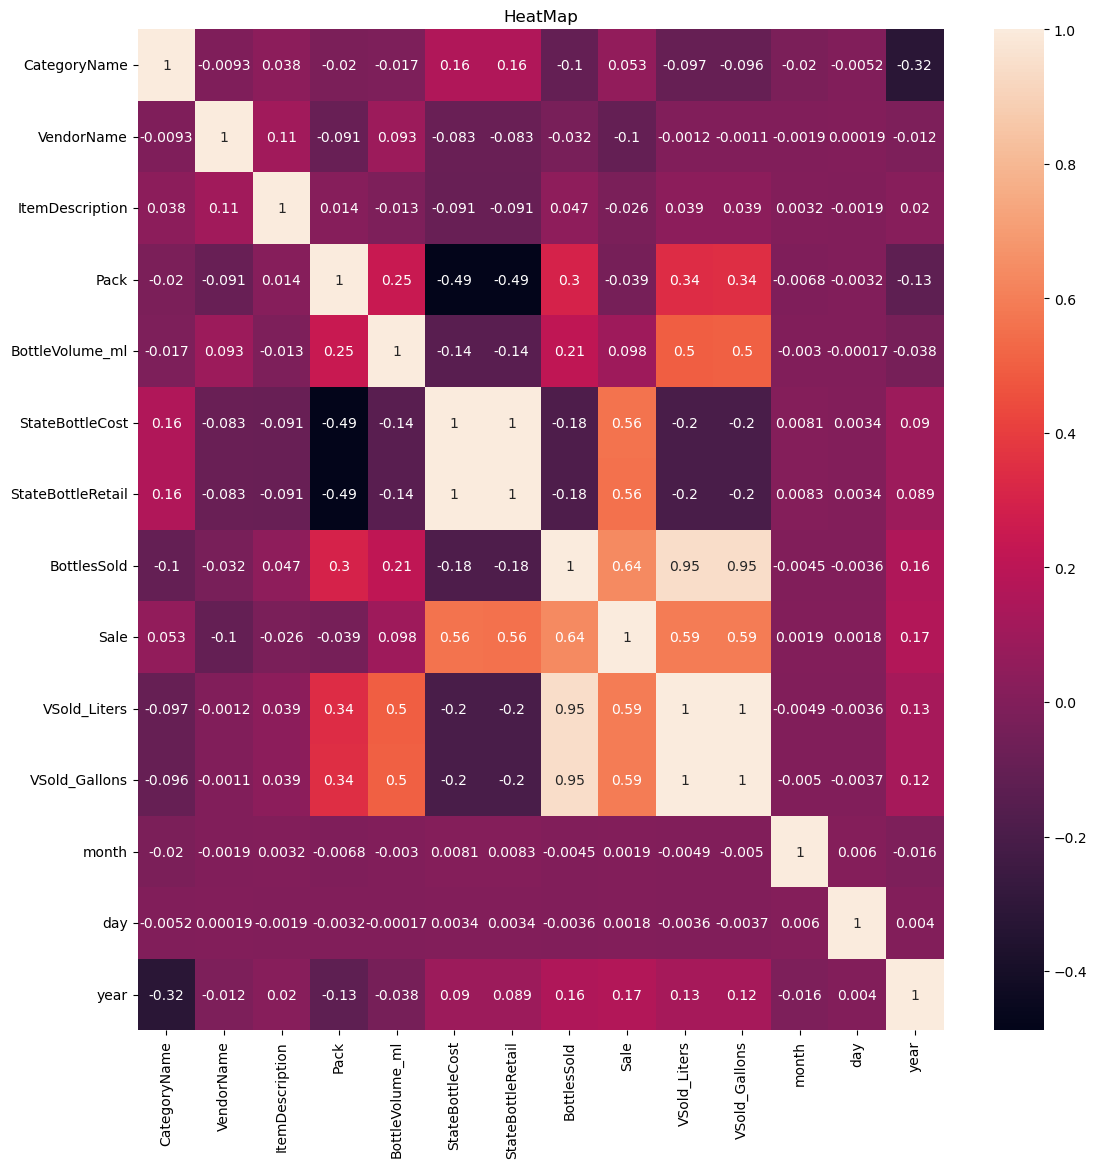

In [51]:
#Realizando o Heatmap para observar a correlação entre os atributos
plt.figure(figsize=(13,13))
plt.title("HeatMap")
sns.heatmap(df_HY_VEE_no_outliers[['CategoryName', 'VendorName', 'ItemDescription', 'Pack', 'BottleVolume_ml', 'StateBottleCost', 'StateBottleRetail', 'BottlesSold', 'Sale', 'VSold_Liters', 'VSold_Gallons', 'month', 'day', 'year']].corr(), annot=True)
plt.show()

In [52]:
print(f"Média de vendas (DataFrame com Outliers): {df_HY_VEE_full['Sale'].mean()}")
print(f"Média de vendas (DataFrame Sem Outliers): {df_HY_VEE_no_outliers['Sale'].mean()}")

Média de vendas (DataFrame com Outliers): 573.1270703110864
Média de vendas (DataFrame Sem Outliers): 159.61003245420736


# Aplicação de modelos - Regressões

Após realizar o pré-processamento da base, será aplicado os dados nos modelos de aprendizado de máquina para regressões.

In [165]:
ranking_aprendizado_custo_computacional = []

## Regressão Linear

Abaixo encontra-se o aprendizado por regressão linear sem outliers. 

In [177]:
%%time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

y_rl = df_HY_VEE_no_outliers['Sale']
x_rl = df_HY_VEE_no_outliers.drop(columns=['Sale', 'BottleVolume_ml', 'Pack', 'ItemDescription', 'CategoryName', 'month', 'day'])

padronizacao = StandardScaler()
x_rl = padronizacao.fit_transform(x_rl)

ln = LinearRegression()

y_rl_pred = cross_val_predict(ln, x_rl, y_rl, cv=10)

print(f"Erro Quadrático Médio (MSE): {mean_squared_error(y_rl, y_rl_pred)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_rl, y_rl_pred))}")
print(f"Erro Absoluto Médio (MAE): {mean_absolute_error(y_rl, y_rl_pred)}")
print(f"Coeficiente de Determinação (R²): {r2_score(y_rl, y_rl_pred)}")
print(f"\nTempo de execução: ")

SyntaxError: invalid syntax (84728854.py, line 27)

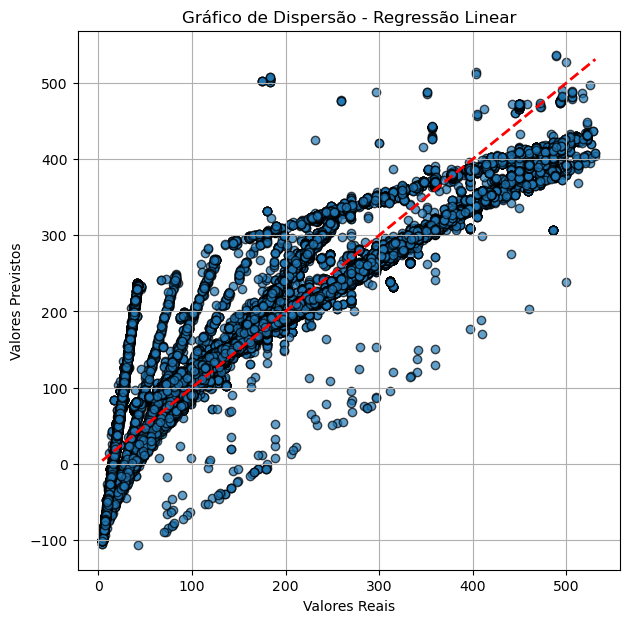

In [70]:
plt.figure(figsize=(7,7))
plt.scatter(y_rl, y_rl_pred, alpha=0.7, edgecolor='k')
plt.plot([y_rl.min(), y_rl.max()], [y_rl.min(), y_rl.max()], color='red', linestyle='--', linewidth=2)  # Linha de perfeição
plt.title("Gráfico de Dispersão - Regressão Linear")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.grid(True)
plt.show()

## SVR (Support Vector Regression)

Será aplicado o modelo de regressão SVR sem outliers.

## Árvore de Decisão 

Abaixo segue os passos da Árvore de Decisão sem outliers.

In [77]:
%%time

from sklearn.tree import DecisionTreeRegressor

y_dt = df_HY_VEE_no_outliers['Sale']
x_dt = df_HY_VEE_no_outliers.drop(columns=['Sale'])

padronizacao =  StandardScaler()
x_dt = padronizacao.fit_transform(x_dt)

arvore_decisao = DecisionTreeRegressor(criterion='squared_error')

y_dt_pred = cross_val_predict(arvore_decisao, x_dt, y_dt, cv=10)

print(f"Erro Quadrático Médio (MSE): {mean_squared_error(y_dt, y_dt_pred)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_dt, y_dt_pred))}")
print(f"Erro Absoluto Médio (MAE): {mean_absolute_error(y_dt, y_dt_pred)}")
print(f"Coeficiente de Determinação (R²): {r2_score(y_dt, y_dt_pred)}")
print(f"\nTempo de execução: ")

Erro Quadrático Médio (MSE): 53.61252913870071
Root Mean Squared Error (RMSE): 7.3220577120575
Erro Absoluto Médio (MAE): 0.6717930002465634
Coeficiente de Determinação (R²): 0.9953672210335536

Tempo de execução: 
CPU times: total: 12.4 s
Wall time: 12.5 s


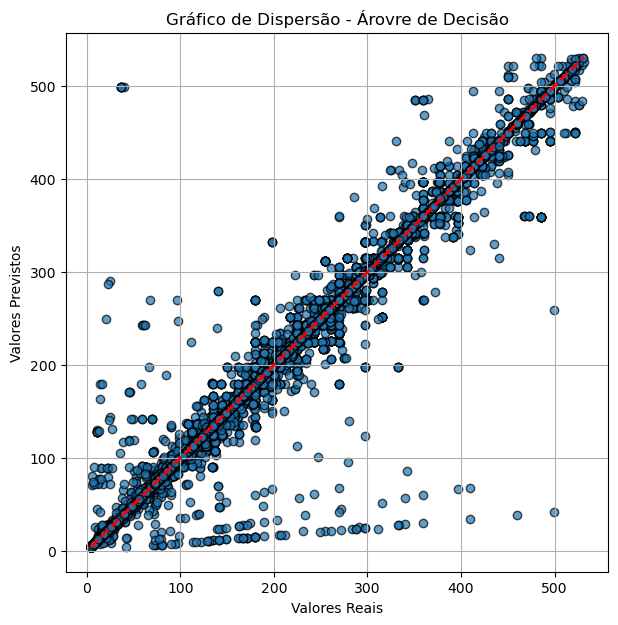

In [79]:
plt.figure(figsize=(7,7))
plt.scatter(y_dt, y_dt_pred, alpha=0.7, edgecolor='k')
plt.plot([y_dt.min(), y_dt.max()], [y_dt.min(), y_dt.max()], color='red', linestyle='--', linewidth=2)  # Linha de perfeição
plt.title("Gráfico de Dispersão - Árovre de Decisão")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.grid(True)
plt.show()

## KNN

Abaixo segue o aprendizado KNN sem outliers.

In [85]:
%%time

from sklearn.neighbors import KNeighborsRegressor

y_knn = df_HY_VEE_no_outliers['Sale']
x_knn = df_HY_VEE_no_outliers.drop(columns=['Sale', 'BottleVolume_ml', 'Pack', 'ItemDescription', 'CategoryName', 'month', 'day'])

padronizacao = StandardScaler()
x_knn = padronizacao.fit_transform(x_knn)

knn = KNeighborsRegressor(n_neighbors=5)

y_knn_pred = cross_val_predict(knn, x_knn, y_knn, cv=10)

print(f"Erro Quadrático Médio (MSE): {mean_squared_error(y_knn, y_knn_pred)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_knn, y_knn_pred))}")
print(f"Erro Absoluto Médio (MAE): {mean_absolute_error(y_knn, y_knn_pred)}")
print(f"Coeficiente de Determinação (R²): {r2_score(y_knn, y_knn_pred)}")
print(f"\nTempo de execução: ")

Erro Quadrático Médio (MSE): 47.06377697607606
Root Mean Squared Error (RMSE): 6.860304437565148
Erro Absoluto Médio (MAE): 1.3172438043402779
Coeficiente de Determinação (R²): 0.9959331134054091

Tempo de execução: 
CPU times: total: 15.1 s
Wall time: 15.5 s


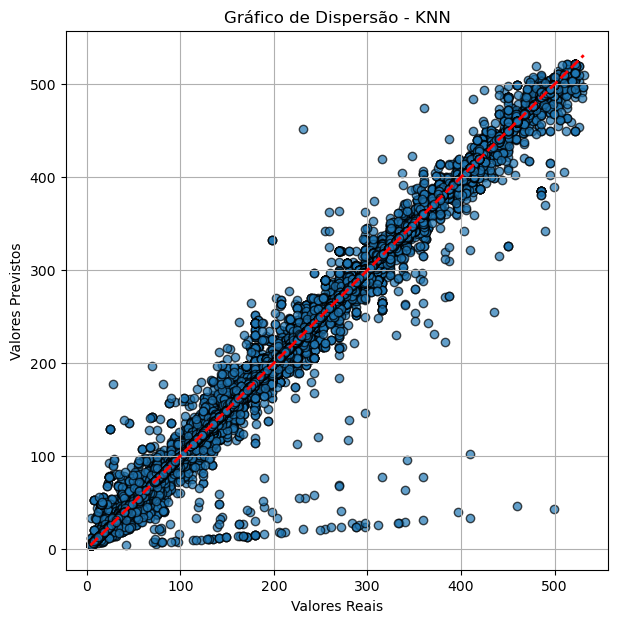

In [93]:
plt.figure(figsize=(7,7))
plt.scatter(y_knn, y_knn_pred, alpha=0.7, edgecolor='k')
plt.plot([y_knn.min(), y_knn.max()], [y_knn.min(), y_knn.max()], color='red', linestyle='--', linewidth=2)  # Linha de perfeição
plt.title("Gráfico de Dispersão - KNN")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.grid(True)
plt.show()

# Métodos de conjunto

Abaixo será listado todo os métodos de conjuntos utilizados nesse aprendizado de máquina.

## Bagging 

Abaixo segue o aprendizado Bagging sem outliers.

In [89]:
%%time

from sklearn.ensemble import BaggingRegressor

y_bgg = df_HY_VEE_no_outliers['Sale']
x_bgg = df_HY_VEE_no_outliers.drop(columns=['Sale'])

padronizacao = StandardScaler()
x_bgg = padronizacao.fit_transform(x_bgg) 

bagging = BaggingRegressor(DecisionTreeRegressor(criterion='squared_error'), n_estimators=10, random_state=42)

y_bgg_pred = cross_val_predict(bagging, x_bgg, y_bgg, cv=10)

print(f"Erro Quadrático Médio (MSE): {mean_squared_error(y_bgg, y_bgg_pred)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_bgg, y_bgg_pred))}")
print(f"Erro Absoluto Médio (MAE): {mean_absolute_error(y_bgg, y_bgg_pred)}")
print(f"Coeficiente de Determinação (R²): {r2_score(y_bgg, y_bgg_pred)}")
print(f"\nTempo de execução: ")

Erro Quadrático Médio (MSE): 40.278769515781974
Root Mean Squared Error (RMSE): 6.34655572068677
Erro Absoluto Médio (MAE): 0.6822341059625275
Coeficiente de Determinação (R²): 0.9965194211277685

Tempo de execução: 
CPU times: total: 1min 29s
Wall time: 1min 32s


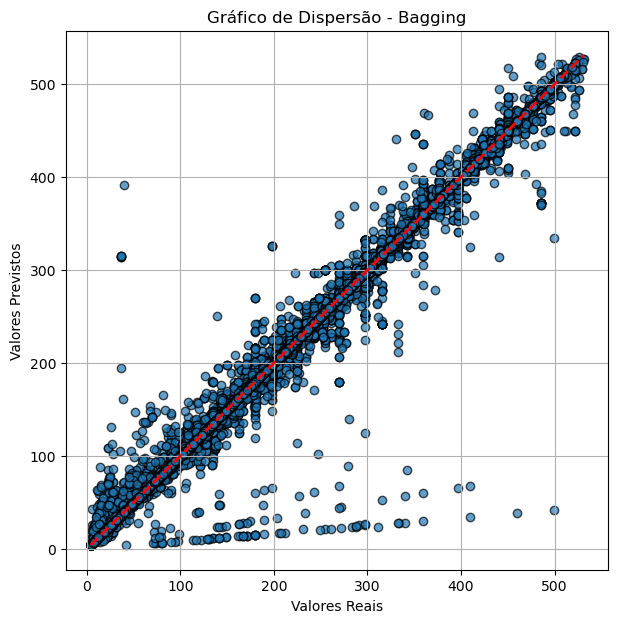

In [91]:
plt.figure(figsize=(7,7))
plt.scatter(y_bgg, y_bgg_pred, alpha=0.7, edgecolor='k')
plt.plot([y_bgg.min(), y_bgg.max()], [y_bgg.min(), y_bgg.max()], color='red', linestyle='--', linewidth=2)  # Linha de perfeição
plt.title("Gráfico de Dispersão - Bagging")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.grid(True)
plt.show()

## Floresta Aleatória

Abaixo segue o aprendizado por Floresta Aleatória sem outliers.

In [81]:
%%time

from sklearn.ensemble import RandomForestRegressor

y_rf = df_HY_VEE_no_outliers['Sale']
x_rf = df_HY_VEE_no_outliers.drop(columns=['Sale'])

padronizacao = StandardScaler()
x_rf = padronizacao.fit_transform(x_rf)

floresta_aleatoria = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=5)

y_rf_pred = cross_val_predict(floresta_aleatoria, x_rf, y_rf, cv=10)

print(f"Erro Quadrático Médio (MSE): {mean_squared_error(y_rf, y_rf_pred)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_rf, y_rf_pred))}")
print(f"Erro Absoluto Médio (MAE): {mean_absolute_error(y_rf, y_rf_pred)}")
print(f"Coeficiente de Determinação (R²): {r2_score(y_rf, y_rf_pred)}")
print(f"\nTempo de execução: ")

Erro Quadrático Médio (MSE): 37.44365552332707
Root Mean Squared Error (RMSE): 6.119122120314896
Erro Absoluto Médio (MAE): 0.6634629403261504
Coeficiente de Determinação (R²): 0.9967644096907542

Tempo de execução: 
CPU times: total: 14min 43s
Wall time: 14min 53s


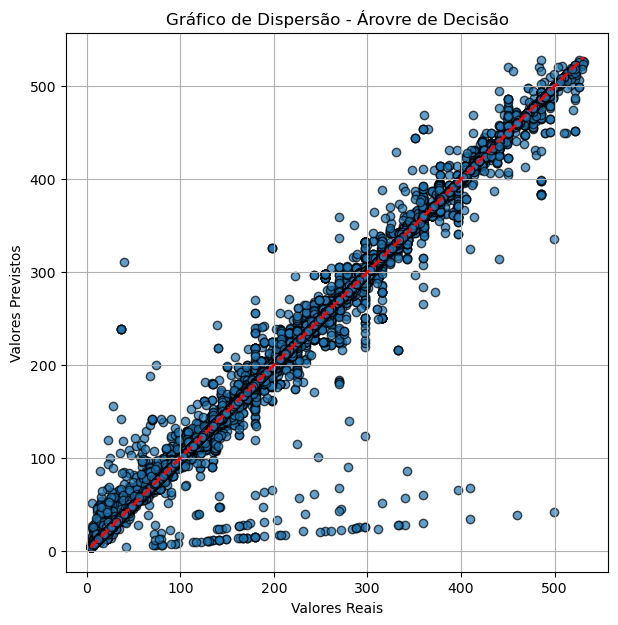

In [83]:
plt.figure(figsize=(7,7))
plt.scatter(y_rf, y_rf_pred, alpha=0.7, edgecolor='k')
plt.plot([y_rf.min(), y_rf.max()], [y_rf.min(), y_rf.max()], color='red', linestyle='--', linewidth=2)  # Linha de perfeição
plt.title("Gráfico de Dispersão - Floresta Aleatória")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.grid(True)
plt.show()

## AdaBoost

Abaixo segue o aprendizado do AdaBoost sem outliers.

In [107]:
%%time

from sklearn.ensemble import AdaBoostRegressor

y_ada = df_HY_VEE_no_outliers['Sale']
x_ada = df_HY_VEE_no_outliers.drop(columns=['Sale'])

padronizacao = StandardScaler()
x_ada = padronizacao.fit_transform(x_ada) 

adaboost = AdaBoostRegressor(estimator=DecisionTreeRegressor(criterion='squared_error', max_depth=3), n_estimators=100, random_state=42)

y_ada_pred = cross_val_predict(adaboost, x_ada, y_ada, cv=10)

print(f"Erro Quadrático Médio (MSE): {mean_squared_error(y_ada, y_ada_pred)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_ada, y_ada_pred))}")
print(f"Erro Absoluto Médio (MAE): {mean_absolute_error(y_ada, y_ada_pred)}")
print(f"Coeficiente de Determinação (R²): {r2_score(y_ada, y_ada_pred)}")
print(f"\nTempo de execução: ")

Erro Quadrático Médio (MSE): 1748.8755034257422
Root Mean Squared Error (RMSE): 41.819558862160925
Erro Absoluto Médio (MAE): 35.32141280827276
Coeficiente de Determinação (R²): 0.8488757427159767

Tempo de execução: 


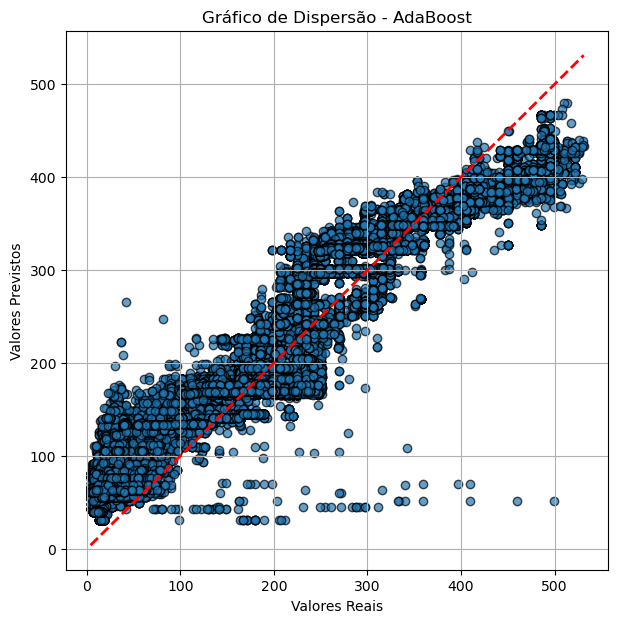

In [108]:
plt.figure(figsize=(7,7))
plt.scatter(y_ada, y_ada_pred, alpha=0.7, edgecolor='k')
plt.plot([y_ada.min(), y_ada.max()], [y_ada.min(), y_ada.max()], color='red', linestyle='--', linewidth=2)  # Linha de perfeição
plt.title("Gráfico de Dispersão - AdaBoost")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.grid(True)
plt.show()

## GradientBoosting 

Abaixo segue o aprendizado do GradientBoosting sem outliers.

In [116]:
%%time

from sklearn.ensemble import GradientBoostingRegressor

y_grab = df_HY_VEE_no_outliers['Sale']
x_grab= df_HY_VEE_no_outliers.drop(columns=['Sale'])

padronizacao = StandardScaler()
x_grab = padronizacao.fit_transform(x_grab) 

gradientboost = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)

y_grab_pred = cross_val_predict(gradientboost, x_grab, y_grab, cv=10)

print(f"Erro Quadrático Médio (MSE): {mean_squared_error(y_grab, y_grab_pred)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_grab, y_grab_pred))}")
print(f"Erro Absoluto Médio (MAE): {mean_absolute_error(y_grab, y_grab_pred)}")
print(f"Coeficiente de Determinação (R²): {r2_score(y_grab, y_grab_pred)}")
print(f"\nTempo de execução: ")

Erro Quadrático Médio (MSE): 59.43363369927313
Root Mean Squared Error (RMSE): 7.709321221694756
Erro Absoluto Médio (MAE): 3.3509777058243775
Coeficiente de Determinação (R²): 0.994864206324064

Tempo de execução: 
CPU times: total: 6min 41s
Wall time: 6min 59s


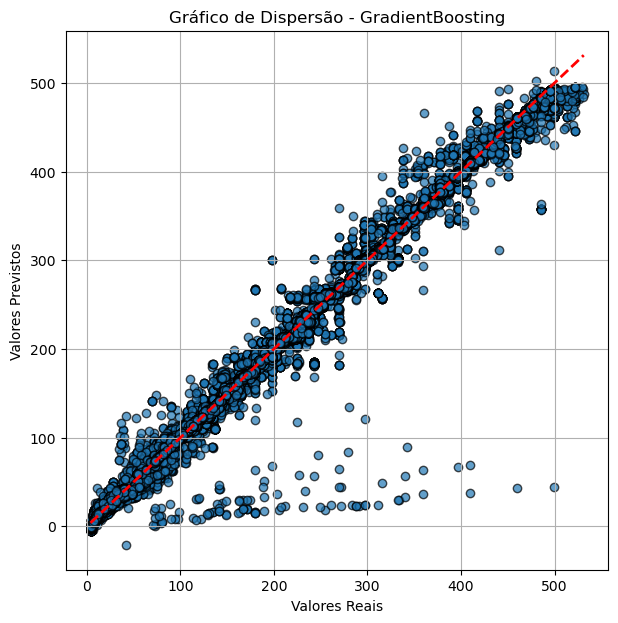

In [117]:
plt.figure(figsize=(7,7))
plt.scatter(y_grab, y_grab_pred, alpha=0.7, edgecolor='k')
plt.plot([y_grab.min(), y_grab.max()], [y_grab.min(), y_grab.max()], color='red', linestyle='--', linewidth=2)  # Linha de perfeição
plt.title("Gráfico de Dispersão - GradientBoosting")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.grid(True)
plt.show()

## Stacking

Abaixo segue o aprendizado Stacking sem outliers.

In [132]:
%%time

from sklearn.ensemble import StackingRegressor

y_stack = df_HY_VEE_no_outliers['Sale']
x_stack= df_HY_VEE_no_outliers.drop(columns=['Sale'])

padronizacao = StandardScaler()
x_stack = padronizacao.fit_transform(x_stack) 

modelos_bases = [
    ('rf', RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=5)),
    ('knn', KNeighborsRegressor(n_neighbors=5))
]

stacking_boost = StackingRegressor(estimators=modelos_bases, final_estimator=LinearRegression())

y_stack_pred = cross_val_predict(stacking_boost, x_stack, y_stack, cv=10)

print(f"Erro Quadrático Médio (MSE): {mean_squared_error(y_stack, y_stack_pred)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_stack, y_stack_pred))}")
print(f"Erro Absoluto Médio (MAE): {mean_absolute_error(y_stack, y_stack_pred)}")
print(f"Coeficiente de Determinação (R²): {r2_score(y_stack, y_stack_pred)}")
print(f"\nTempo de execução: ")

Erro Quadrático Médio (MSE): 116.40881615805688
Root Mean Squared Error (RMSE): 10.789291735700582
Erro Absoluto Médio (MAE): 5.585566056534249
Coeficiente de Determinação (R²): 0.9899408529373653

Tempo de execução: 
CPU times: total: 48min 45s
Wall time: 49min 31s


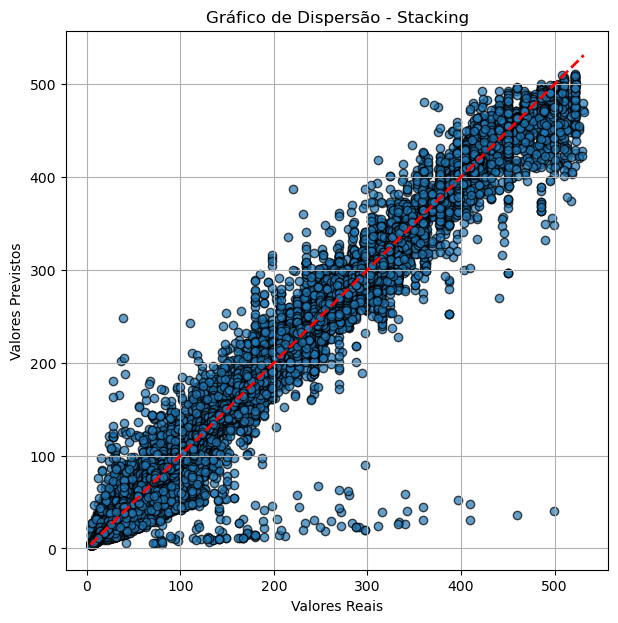

In [137]:
plt.figure(figsize=(7,7))
plt.scatter(y_stack, y_stack_pred, alpha=0.7, edgecolor='k')
plt.plot([y_stack.min(), y_stack.max()], [y_stack.min(), y_stack.max()], color='red', linestyle='--', linewidth=2)  # Linha de perfeição
plt.title("Gráfico de Dispersão - Stacking")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.grid(True)
plt.show()